In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
def count_keywords(year):
    df=pd.read_csv(f'Data/{year}_dates_and_keyword.csv')
    df.sort_values('publication_date', inplace=True)
    global df_ancillary_kw
    df_ancillary_kw=pd.read_csv('keyword_names_decrease.csv')
    keyword_list=[rows['Keyword Names'] for index, rows in df_ancillary_kw.iterrows()]
    keyword_match_df=pd.DataFrame(df.loc[df['keywords'].isin(keyword_list)])
    keywords_counts=pd.DataFrame(keyword_match_df['publication_date'].value_counts())
    keywords_counts.rename(columns={'publication_date': 'keywords_count'}, inplace=True)
    keywords_counts.sort_index(inplace=True)
    keywords_counts=keywords_counts.reset_index()
    keywords_counts.rename(columns={'index': 'publication_date'}, inplace=True)
    keywords_counts.to_csv(f'Data/{year}_keywords_counts.csv', index=False)

In [41]:
count_keywords(2008)

In [42]:
count_keywords(2012)

In [43]:
count_keywords(2016)

In [44]:
count_keywords(2020)

In [45]:
df_2008=pd.read_csv('Data/ancillary_2008_keywords_counts.csv')
df_2008.shape

(154, 2)

In [46]:
df_2012=pd.read_csv('Data/ancillary_2012_keywords_counts.csv')
df_2012.shape

(154, 2)

In [48]:
df_2016=pd.read_csv('Data/ancillary_2016_keywords_counts.csv')
df_2016.shape

(154, 2)

In [49]:
df_2020=pd.read_csv('Data/ancillary_2020_keywords_counts.csv')
df_2020.shape

(154, 2)

In [50]:
df_all_years=pd.concat([df_2008, df_2012, df_2016, df_2020])

In [51]:
df_all_years.head()
df_all_years.to_csv('Data/all_years_ancillary_keywords_count_by_day.csv')

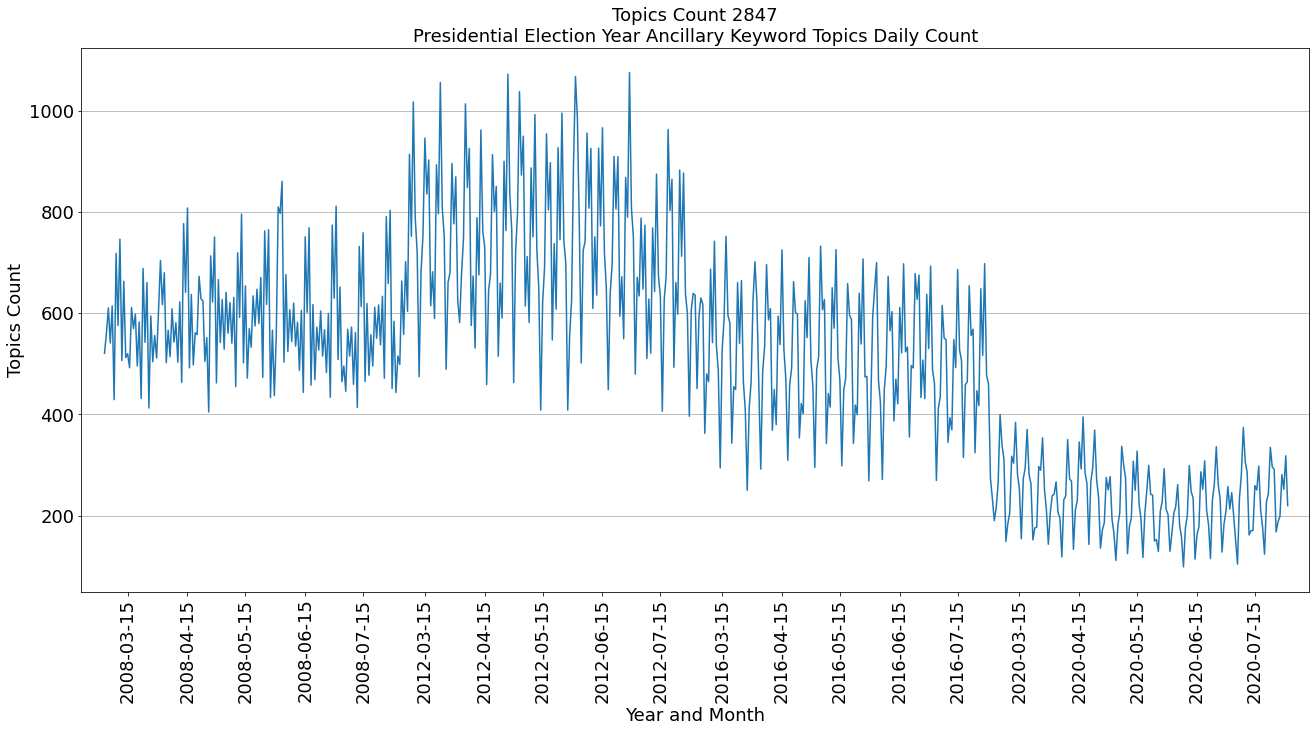

In [54]:
ticks=[row['publication_date']  for index, row in df_all_years.iterrows() if '-15' in(row['publication_date'])]
plt.figure(figsize=(22,10))
plt.xlim(-10, len(df_all_years['publication_date'])+10)
plt.grid(axis='y')

plt.plot(df_all_years['publication_date'], df_all_years['keywords_count'].rolling(window=3).mean())
plt.title('Topics Count 2847\nPresidential Election Year Ancillary Keyword Topics Daily Count', size=18)
plt.xlabel('Year and Month', size=18)
plt.ylabel('Topics Count', size=18)
plt.xticks(ticks, rotation=90, size=18)
plt.yticks(size=18)
plt.show()